<a href="https://colab.research.google.com/github/sprovine/hellotf/blob/master/hellotf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training image


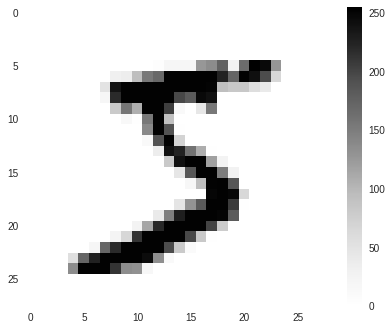

First 25 training images


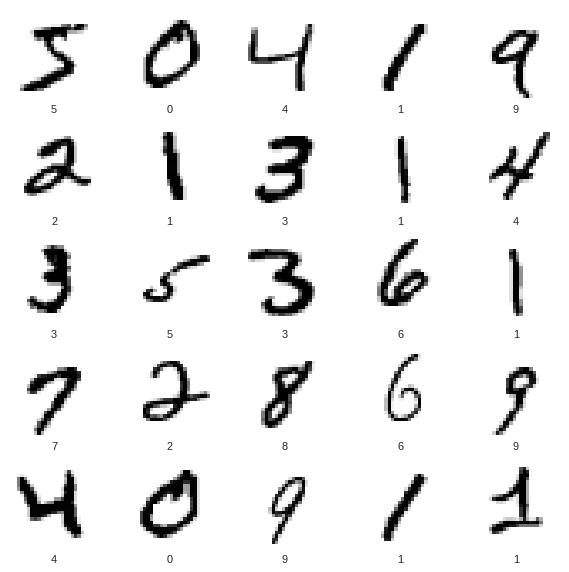

Training
10000/10000 [==============================] - 1s 56us/sample - loss: 0.1356 - acc: 0.9586
Test accuracy:  0.9586
Test image


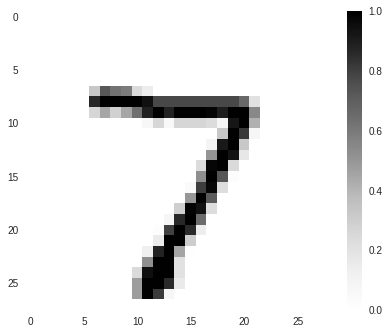

Prediction


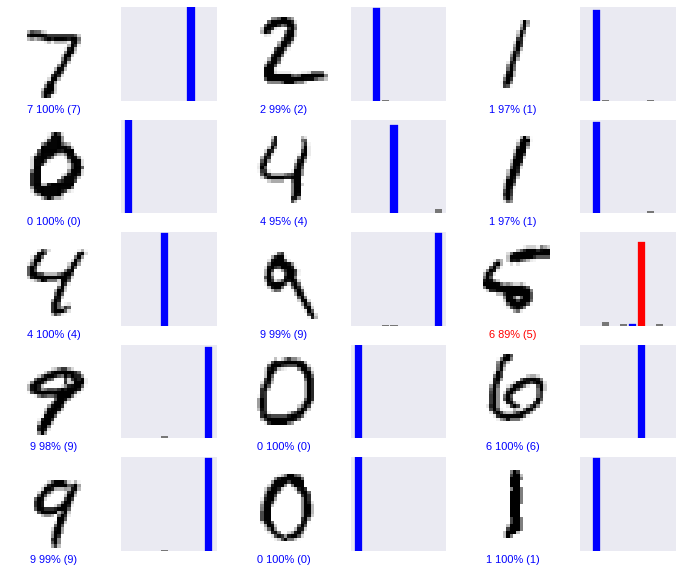

In [0]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#Loads dataset and creates names for each class
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#Displays one image
print("Training image")
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#Preprocessing data
#Scales pixel values to range between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

#Displays first 25 images
print("First 25 training images")
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  
plt.show()

#Layers
model = keras.Sequential([
    
    # Unstacks rows of pixels and lines them up to reformat data
    keras.layers.Flatten(input_shape = (28, 28)),
    
    # 128 nodes
    keras.layers.Dense(128, activation = tf.nn.relu),
    
    #Final layer, that returns an array of 10 probability scores that sum to 1
    #Each node contains a number representing the probability that an image belongs to that class
    keras.layers.Dense(10, activation = tf.nn.softmax)
    
])

#Compiling
model.compile(optimizer = 'adam', #How the model is updated based on data and loss function
             loss = 'sparse_categorical_crossentropy', #Measures accuracy, to be minimized
             metrics=['accuracy'] #Monitors training utilizing accuracy as a metric
             )

#Training
print("Training")
model.fit(train_images, train_labels, epochs = 1)

#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

#Displays first test image
print("Test image")
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#Predictions
#A prediction is an array of 10 numbers describing the model's confidence for each number the image could correspond to
print("Predictions")
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])

